<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
house age                              414 non-null float64
distance to the nearest MRT station    414 non-null float64
number of convenience stores           414 non-null int64
latitude                               414 non-null float64
longitude                              414 non-null float64
house price of unit area               414 non-null float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None
   house age  distance to the nearest MRT station  \
0       32.0                             84.87882   
1       19.5                            306.59470   
2       13.3                            561.98450   
3       13.3                            561.98450   
4        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1

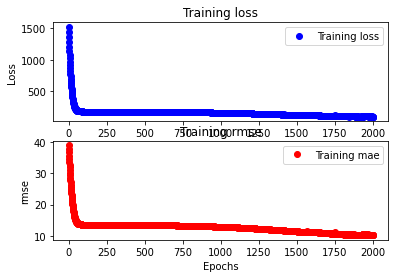

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import tensorflow as tf
import matplotlib.pyplot as plt

## 데이터 읽어오기.
df = pd.read_csv("../dataset/house_price_of_unit_area.csv")
print(df.info())
print(df.head())

## data copy
dataset=df.copy()
tf.random.set_seed(777) ### random seed 고정해줘서 돌릴때마 랜덤값을 고정.

## 데이터에서 label 데이터 추출
label_data=dataset.pop("house price of unit area")

# 모델의 설계
input_Layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(300, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

## loss / 학습 최적화 방법 / 평가 방법 결정하기
loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.00004)
metrics=tf.keras.metrics.RootMeanSquaredError() ## regression이므로 평가 지표는 RootMeanSquaredError 된다.( MSE 사용해도 무방)

## 모델 동작하기 위해 compile
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

## 학습 돌리면서  결과를 histiry라는 변수에 저장하기
result=model.fit(dataset, label_data, epochs=2000, batch_size=100)
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

### history에서 loss key를 가지는 값들만 추출
loss = result.history['loss']
### loss 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error key를 가지는 값들만 추출
mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae) + 1)
### mean_absolute_error 를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, mae, 'ro', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

## dataset -> model -> predict 값 - label_Data 의 값을 추출.
print(model.evaluate(dataset, label_data))
print("\n Test rmse: %.4f" % (model.evaluate(dataset, label_data)[1]))

plt.show()